In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset from CSV file
df = pd.read_csv("dataset.csv")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features and target variable
X = df_imputed.drop('Status', axis=1)
y = df_imputed['Status']

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

# Get feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names)

# Scale numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(exclude=['object']))

# Concatenate encoded categorical variables and scaled numerical variables
X_processed = pd.concat([X_encoded, pd.DataFrame(X_scaled, columns=X.select_dtypes(exclude=['object']).columns)], axis=1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Load dataset from CSV file
df = pd.read_csv("dataset.csv")

# Splitting data into features and target
X = df[['Lungs','HB']]
y = df['Status']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.945


Accuracy: 0.893


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


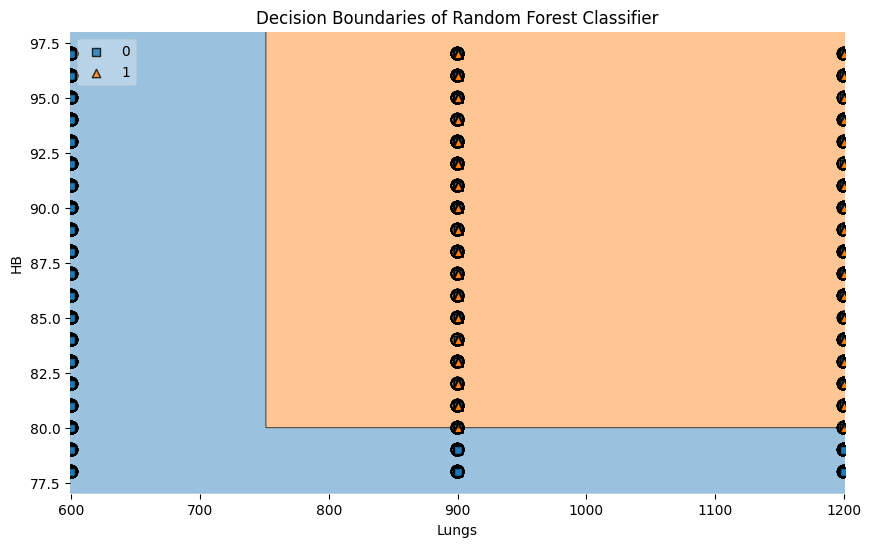

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Load dataset from CSV file
df = pd.read_csv("dataset.csv")

# Separate features and target variable
X = df[['Lungs','SpO2']]
y = df['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2, X_highlight=X_test.values)
plt.xlabel('Lungs')
plt.ylabel('HB')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()
